In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

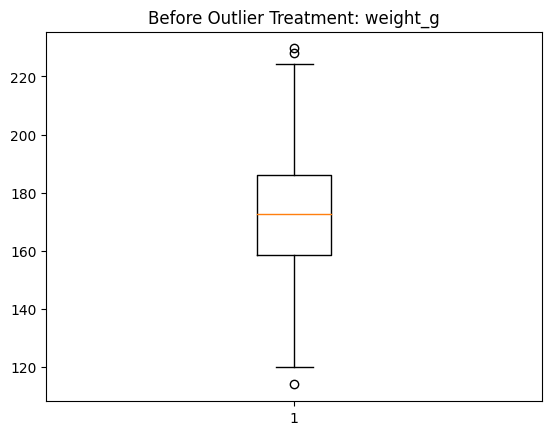

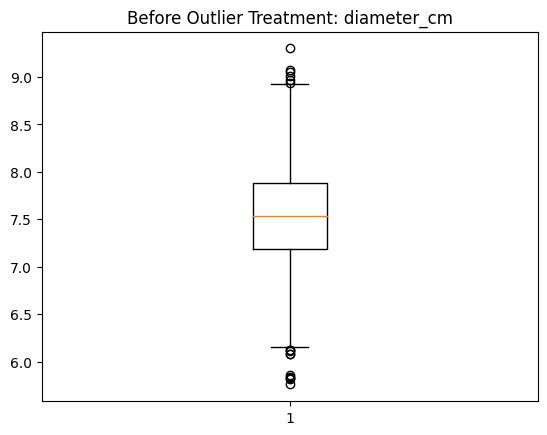

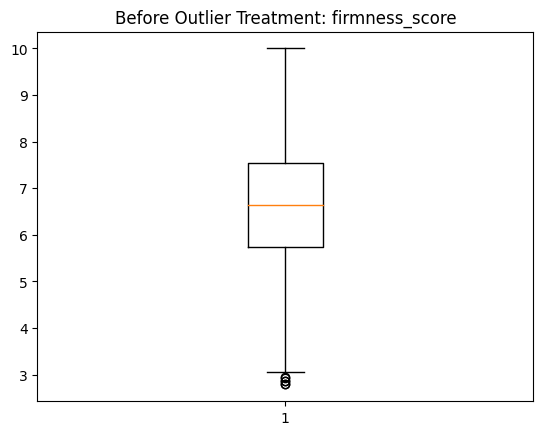

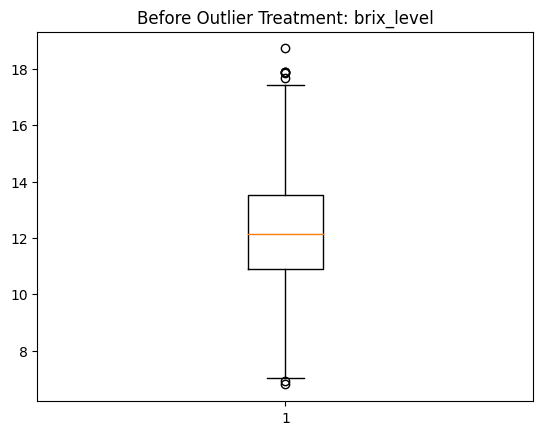

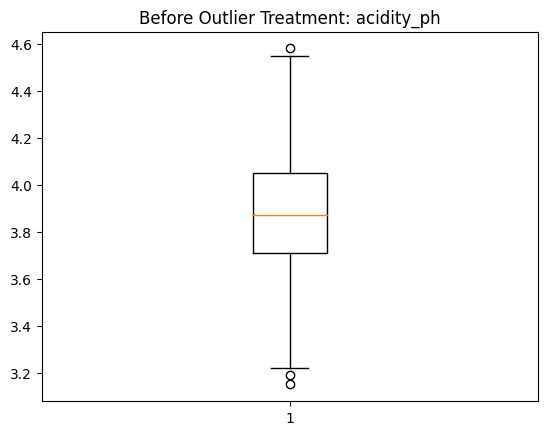

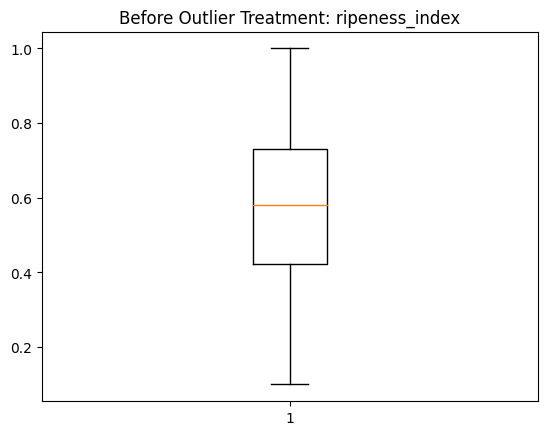

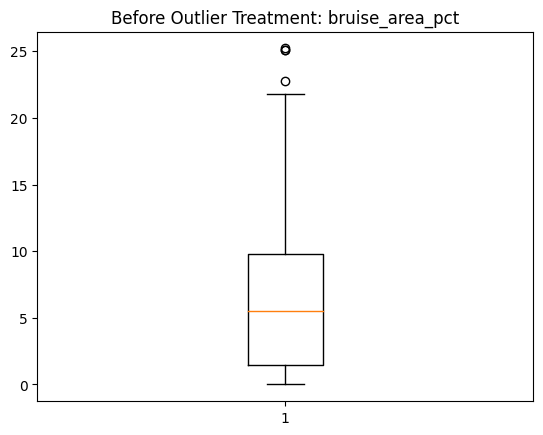

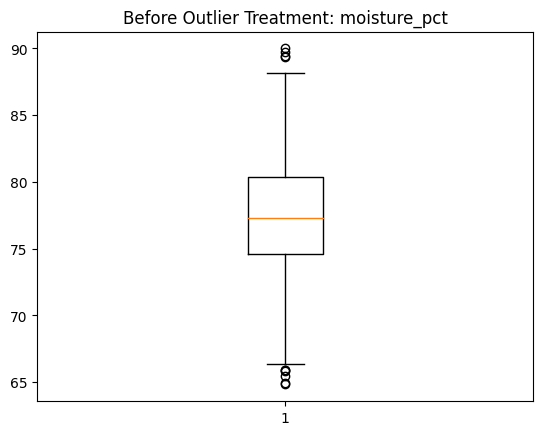

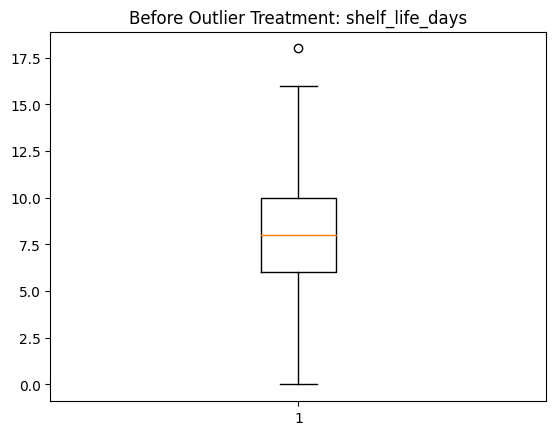

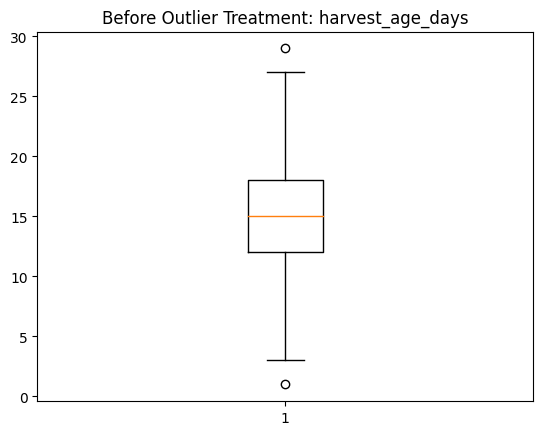

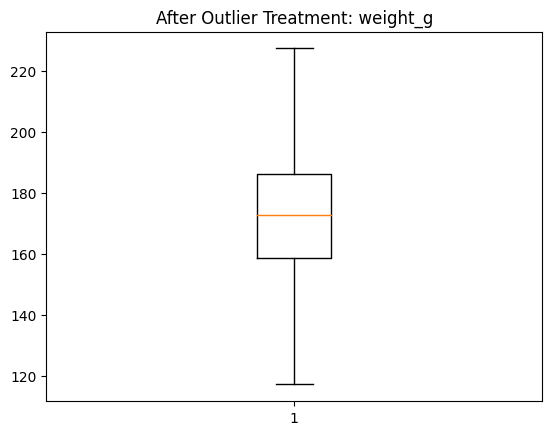

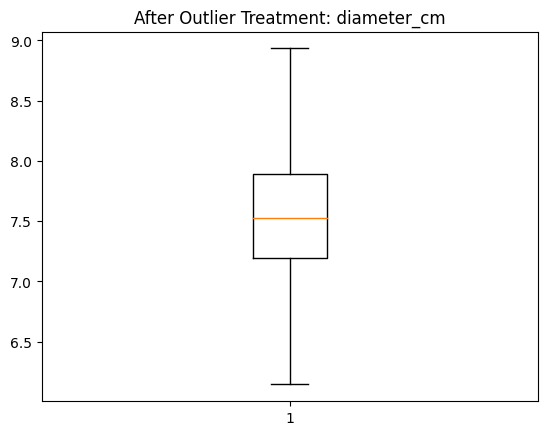

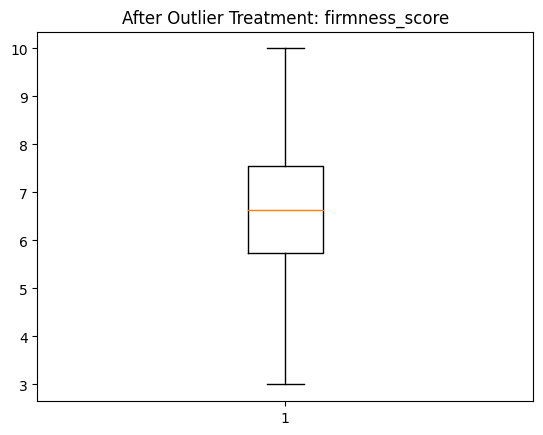

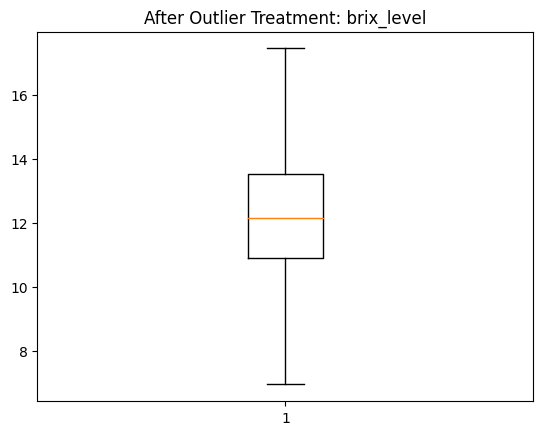

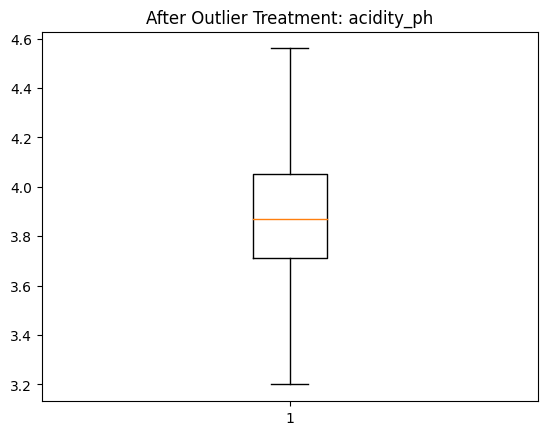

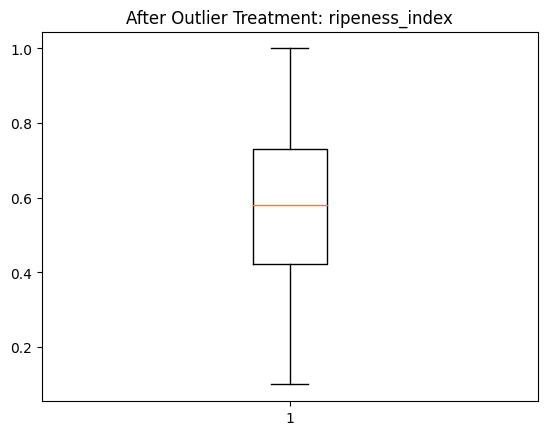

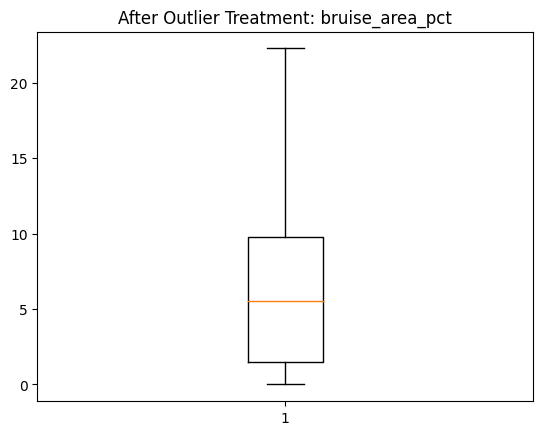

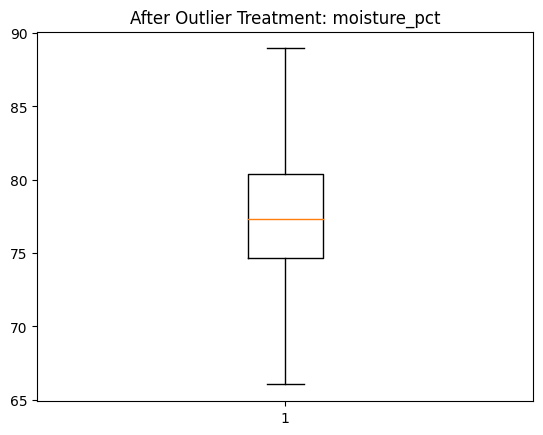

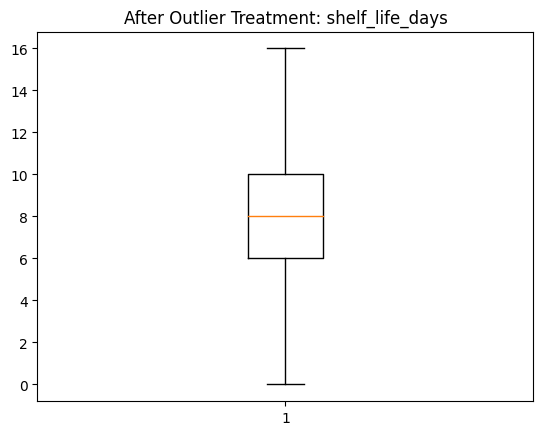

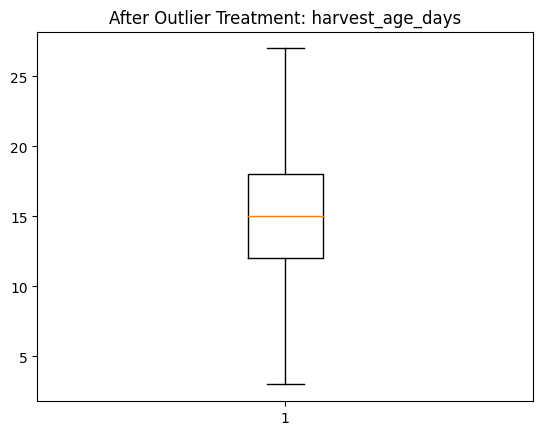

Validation Log Loss: 1.3687301411671495


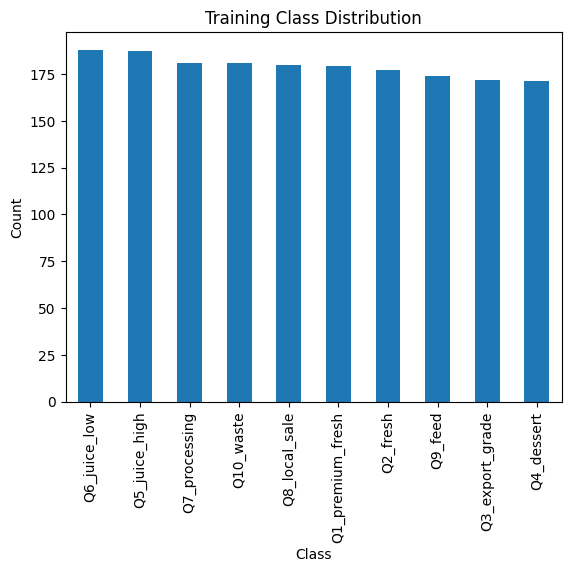


✅ Submission created!
   id  Status_Q10_waste  Status_Q1_premium_fresh  Status_Q2_fresh  \
0   0          0.000328                 0.003684         0.169634   
1   1          0.810671                 0.000199         0.000197   
2   2          0.000410                 0.737276         0.210946   
3   3          0.001047                 0.006667         0.013967   
4   4          0.010714                 0.000403         0.000396   

   Status_Q3_export_grade  Status_Q4_dessert  Status_Q5_juice_high  \
0                0.408628           0.325944              0.076043   
1                0.000189           0.000262              0.000529   
2                0.044298           0.003256              0.001355   
3                0.686000           0.161604              0.117318   
4                0.000678           0.000604              0.003663   

   Status_Q6_juice_low  Status_Q7_processing  Status_Q8_local_sale  \
0             0.014301              0.000659              0.000422   
1

In [7]:
# # ==========================================================
# # KAGGLE ML EXAM – MULTI-CLASS CLASSIFICATION TEMPLATE
# # Random Forest (End-to-End)
# # ==========================================================

# # =====================
# # 1. IMPORT LIBRARIES
# # =====================
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import LabelEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import joblib

# import warnings
# warnings.filterwarnings('ignore')

# # =====================
# # 2. LOAD DATA
# # =====================
# train_df = pd.read_csv('/kaggle/input/mle-ese-mock/train (5).csv')
# test_df  = pd.read_csv('/kaggle/input/mle-ese-mock/test (4).csv')

# TARGET_COL = 'quality_grade'   # CHANGE IF REQUIRED

# # =====================
# # 3. EDA & VISUALIZATION (BEFORE CLEANING)
# # =====================
# print(train_df.info())
# print(train_df.describe())

# # Target distribution (multi-class)
# plt.figure(figsize=(6,4))
# sns.countplot(x=train_df[TARGET_COL])
# plt.title('Target Distribution (Before Cleaning)')
# plt.show()

# # Boxplots for numeric features
# num_cols = train_df.drop(TARGET_COL, axis=1).select_dtypes(include=np.number).columns

# for col in num_cols:
#     plt.figure(figsize=(4,2))
#     sns.boxplot(x=train_df[col])
#     plt.title(f'Boxplot of {col} (Before Cleaning)')
#     plt.show()

# # =====================
# # 4. HANDLE CATEGORICAL FEATURES
# # =====================
# label_encoders = {}

# for col in train_df.select_dtypes(include='object').columns:
#     if col != TARGET_COL:
#         le = LabelEncoder()
#         train_df[col] = le.fit_transform(train_df[col].astype(str))
#         test_df[col]  = le.transform(test_df[col].astype(str))
#         label_encoders[col] = le

# # Encode target (mandatory for multi-class)
# target_encoder = LabelEncoder()
# train_df[TARGET_COL] = target_encoder.fit_transform(train_df[TARGET_COL])

# # =====================
# # 5. HANDLE MISSING VALUES
# # =====================
# imputer = SimpleImputer(strategy='median')
# train_df[num_cols] = imputer.fit_transform(train_df[num_cols])
# test_df[num_cols]  = imputer.transform(test_df[num_cols])

# # =====================
# # 6. REMOVE OUTLIERS (IQR METHOD)
# # =====================
# def iqr_clip(df, columns):
#     for col in columns:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower = Q1 - 1.5 * IQR
#         upper = Q3 + 1.5 * IQR
#         df[col] = np.clip(df[col], lower, upper)
#     return df

# train_df = iqr_clip(train_df, num_cols)

# # =====================
# # 7. VISUALIZATION (AFTER CLEANING)
# # =====================
# plt.figure(figsize=(6,4))
# sns.countplot(x=train_df[TARGET_COL])
# plt.title('Target Distribution (After Cleaning)')
# plt.show()

# for col in num_cols:
#     plt.figure(figsize=(4,2))
#     sns.boxplot(x=train_df[col])
#     plt.title(f'Boxplot of {col} (After Cleaning)')
#     plt.show()

# # =====================
# # 8. TRAIN–VALIDATION SPLIT
# # =====================
# X = train_df.drop(TARGET_COL, axis=1)
# y = train_df[TARGET_COL]

# X_train, X_val, y_train, y_val = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# # =====================
# # 9. SCALING
# # =====================
# # Not required for Random Forest (tree-based model)

# # =====================
# # 10. HYPERPARAMETER TUNING (GRIDSEARCH)
# # =====================
# param_grid = {
#     'n_estimators': [200, 300],
#     'max_depth': [None, 15, 25],
#     'min_samples_split': [2, 5]
# }

# rf_base = RandomForestClassifier(
#     random_state=42,
#     n_jobs=-1
# )

# grid = GridSearchCV(
#     rf_base,
#     param_grid,
#     cv=3,
#     scoring='accuracy',
#     n_jobs=-1
# )

# grid.fit(X_train, y_train)

# best_model = grid.best_estimator_
# print('Best Parameters:', grid.best_params_)

# # =====================
# # 11. MODEL EVALUATION
# # =====================
# y_val_pred = best_model.predict(X_val)

# print('Validation Accuracy:', accuracy_score(y_val, y_val_pred))
# print(confusion_matrix(y_val, y_val_pred))
# print(classification_report(y_val, y_val_pred))

# # =====================
# # 12. SAVE MODEL
# # =====================
# joblib.dump(best_model, 'rf_multiclass_model.pkl')

# # =====================
# # UNIVERSAL MULTICLASS SUBMISSION (ONE-HOT SAFE)
# # =====================
# # =====================
# # FINAL SAFE MULTICLASS SUBMISSION (11 → 10 CLASSES)
# # =====================

# EXPECTED_COLS = [
#     'Status_Q1_premium_fresh',
#     'Status_Q2_fresh',
#     'Status_Q3_export_grade',
#     'Status_Q4_dessert',
#     'Status_Q5_juice_high',
#     'Status_Q6_juice_low',
#     'Status_Q7_processing',
#     'Status_Q8_local_sale',
#     'Status_Q9_feed',
#     'Status_Q10_waste'
# ]

# # Handle ID safely
# if 'id' in test_df.columns:
#     test_ids = test_df['id']
# else:
#     test_ids = test_df.index

# # Align features to training
# test_df = test_df.reindex(
#     columns=best_model.feature_names_in_,
#     fill_value=0
# )

# # Predict probabilities
# proba = best_model.predict_proba(test_df)

# # Convert to DataFrame using model class order
# proba_df = pd.DataFrame(proba, columns=best_model.classes_)

# # Drop EXTRA class (always the one not required)
# proba_df = proba_df.iloc[:, :10]   # keep only first 10

# # Rename columns EXACTLY as required
# proba_df.columns = EXPECTED_COLS

# # Insert ID
# proba_df.insert(0, 'id', test_ids)

# # Save
# proba_df.to_csv('submission.csv', index=False)
# print('submission_multiclass.csv created')


# ============================================================
# CONFIG SECTION (ONLY EDIT THIS FOR NEW PROBLEMS)
# ============================================================

TRAIN_PATH = "/kaggle/input/mle-ese-mock/train (5).csv"
TEST_PATH  = "/kaggle/input/mle-ese-mock/test (4).csv"

ID_COL     = "id"
TARGET_COL = "quality_grade"

SUBMISSION_PREFIX = "Status"
TEST_SIZE = 0.2
RANDOM_STATE = 42


# ============================================================
# STEP 1: IMPORT LIBRARIES
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import log_loss
from sklearn.ensemble import HistGradientBoostingClassifier


# ============================================================
# STEP 2: LOAD DATA
# ============================================================

train = pd.read_csv(TRAIN_PATH)
test  = pd.read_csv(TEST_PATH)

test_id = test[ID_COL]
test = test.drop(columns=[ID_COL])


# ============================================================
# STEP 3: CLEAN TARGET
# ============================================================

train = train.dropna(subset=[TARGET_COL])

X = train.drop(columns=[ID_COL, TARGET_COL])
y = train[TARGET_COL]


# ============================================================
# STEP 4: FEATURE TYPE DETECTION (AUTO)
# ============================================================

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


# ============================================================
# STEP 5: 🔍 OUTLIER VISUALIZATION (BEFORE)
# ============================================================

for col in numeric_features:
    plt.figure()
    plt.boxplot(X[col].dropna())
    plt.title(f"Before Outlier Treatment: {col}")
    plt.show()


# ============================================================
# STEP 6: SAFE OUTLIER HANDLING (IQR CAPPING)
# ============================================================

def cap_outliers_iqr(df, numeric_cols):
    df = df.copy()
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    return df

X = cap_outliers_iqr(X, numeric_features)
test[numeric_features] = cap_outliers_iqr(test, numeric_features)[numeric_features]


# ============================================================
# STEP 7: 🔍 OUTLIER VISUALIZATION (AFTER)
# ============================================================

for col in numeric_features:
    plt.figure()
    plt.boxplot(X[col].dropna())
    plt.title(f"After Outlier Treatment: {col}")
    plt.show()


# ============================================================
# STEP 8: TRAIN–TEST SPLIT
# ============================================================

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)


# ============================================================
# STEP 9: PREPROCESSING PIPELINES
# ============================================================

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])


# ============================================================
# STEP 10: MODEL (MULTICLASS PROBABILITY)
# ============================================================

model = HistGradientBoostingClassifier(
    loss="log_loss",
    max_iter=100,
    learning_rate=0.05,
    max_depth=6,
    random_state=RANDOM_STATE
)


# ============================================================
# STEP 11: FULL PIPELINE
# ============================================================

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', model)
])


# ============================================================
# STEP 12: LABEL ENCODING
# ============================================================

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc   = le.transform(y_val)


# ============================================================
# STEP 13: TRAIN MODEL
# ============================================================

pipeline.fit(X_train, y_train_enc)


# ============================================================
# STEP 14: VALIDATION METRIC
# ============================================================

val_proba = pipeline.predict_proba(X_val)
loss = log_loss(y_val_enc, val_proba)
print("Validation Log Loss:", loss)


# ============================================================
# STEP 15: CLASS DISTRIBUTION VISUALIZATION
# ============================================================

plt.figure()
pd.Series(y_train).value_counts().plot(kind='bar')
plt.title("Training Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


# ============================================================
# STEP 16: TEST PREDICTIONS
# ============================================================

test_proba = pipeline.predict_proba(test)


# ============================================================
# STEP 17: SUBMISSION FILE
# ============================================================

class_names = le.classes_

submission = pd.DataFrame(
    test_proba,
    columns=[f"{SUBMISSION_PREFIX}_{cls}" for cls in class_names]
)

submission.insert(0, ID_COL, test_id)
submission.to_csv("submission.csv", index=False)

print("\n✅ Submission created!")
print(submission.head())
